In [34]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *
from encapsulage import *
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


In [3]:
import base64
from IPython.display import Image, display

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

In [2]:
def creerEncoder(dimensions, fActivation):
  """Creer un encoder
  dimensions: liste des tailles des couches
  fActivation: la fonction d'activation pour chaque couche
  """
  l_module = []
  for i in range(len(dimensions)-1):
    l_module.append(Linear(dimensions[i],dimensions[i+1], mode = 1)) # mode 1: xavier uniforme
    l_module.append(fActivation)
  return l_module

def creerDecoder(dimensions, fActivation, fSortie = Sigmoide()):
  """Creer un decoder
  dimensions: liste des tailles des couches
  fActivation: la fonction d'activation pour chaque couche
  """
  l_module = []
  for i in range(len(dimensions)-1):
    l_module.append(Linear(dimensions[i],dimensions[i+1], mode = 1)) # mode 1: xavier uniforme
    l_module.append(fActivation)
  l_module[-1] = fSortie #changer la fonction d'activation de la derniere couche par fSortie
  return l_module

#Application avec Tangente hyperbolique

In [23]:
print("Encodage")
mm("""
graph LR;
    N1(Lin.256,100)--> N2(TanH);
    N2--> N3(Lin.100,10);
    N3--> N4(TanH);
""")

print("Décodage")
mm("""
graph LR;
    N5(Lin.10,100)--> N6(TanH);
    N6--> N7(Lin.100,256);
    N7--> N8(Sigmoide);
""")

Encodage


Décodage


100%|██████████| 20/20 [00:38<00:00,  1.95s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

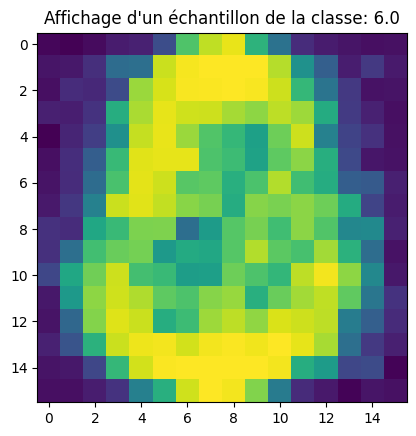

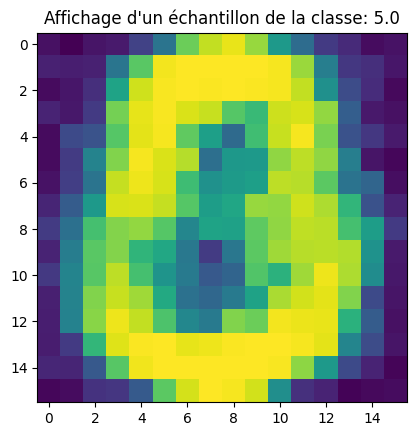

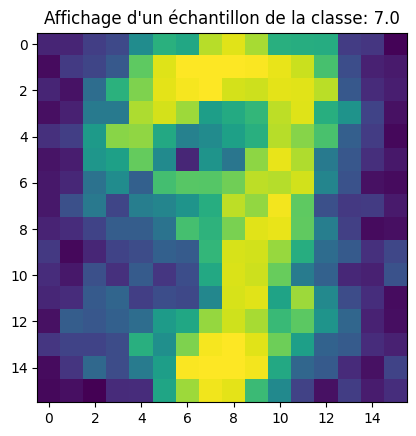

In [17]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, TanH())
l_decoder = creerDecoder(dim[::-1], TanH(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# eps 3e-6, mini-b 32, epochs 20: ressembler un peu
# eps 4e-6,mini-b 32, epochs 20: un peu moins

#SGD
nb_epoch = 20
SGD(net, data, BCELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

## K-MEANS

In [18]:
from sklearn.cluster import KMeans

MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_latent)

In [19]:
# Évaluation des performances
cluster_labels = kmeans.labels_

# Calculer purity
for i in np.unique(Y):
  inx_cluster = np.where(cluster_labels==i)[0]
  Y_cluster = Y[inx_cluster]
  val, occ = np.unique(Y_cluster, return_counts=True)
  print(f"Purity cluster {i}, valeur majoritaire {val[np.argmax(occ)]}: {np.max(occ)/np.sum(occ)}")

Purity cluster 0.0, valeur majoritaire 2.0: 0.6351931330472103
Purity cluster 1.0, valeur majoritaire 1.0: 0.7550713749060857
Purity cluster 2.0, valeur majoritaire 7.0: 0.5819070904645477
Purity cluster 3.0, valeur majoritaire 5.0: 0.3468354430379747
Purity cluster 4.0, valeur majoritaire 0.0: 0.6046195652173914
Purity cluster 5.0, valeur majoritaire 9.0: 0.39281437125748503
Purity cluster 6.0, valeur majoritaire 6.0: 0.7563694267515924
Purity cluster 7.0, valeur majoritaire 3.0: 0.6666666666666666
Purity cluster 8.0, valeur majoritaire 3.0: 0.2996031746031746
Purity cluster 9.0, valeur majoritaire 0.0: 0.40979955456570155


## Projection 2D avec T-SNE

In [20]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_latent)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.014s...
[t-SNE] Computed neighbors for 7291 samples in 0.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 0.124661
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.750946
[t-SNE] KL divergence after 1000 iterations: 1.234020


[Text(0.5, 1.0, 'T-SNE projection sur data manuscrits')]

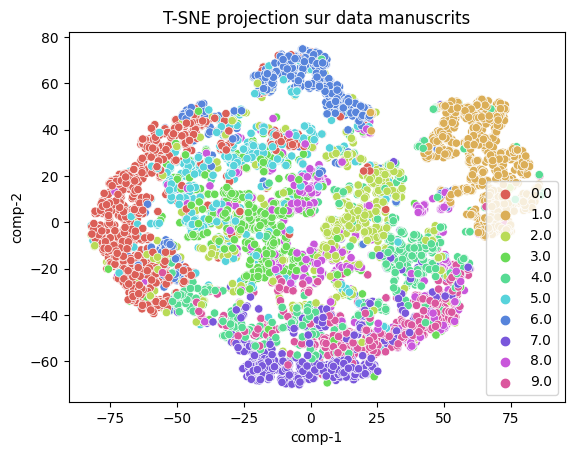

In [21]:
#plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE projection sur data manuscrits")

#Application avec ReLU

In [24]:
print("Encodage")
mm("""
graph LR;
    N1(Lin.256,100)--> N2(ReLU);
    N2--> N3(Lin.100,10);
    N3--> N4(ReLU);
""")

print("Décodage")
mm("""
graph LR;
    N5(Lin.10,100)--> N6(ReLU);
    N6--> N7(Lin.100,256);
    N7--> N8(Sigmoide);
""")

Encodage


Décodage


100%|██████████| 20/20 [00:41<00:00,  2.09s/it]


Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 7.0")

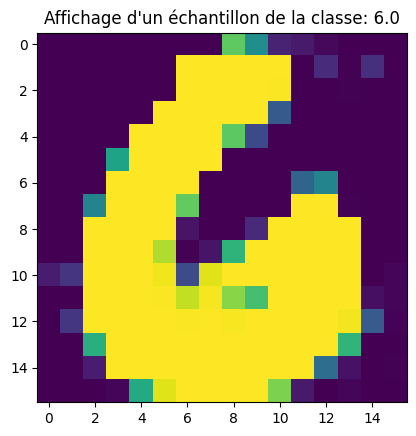

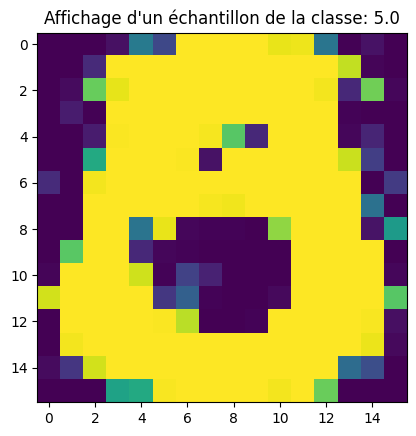

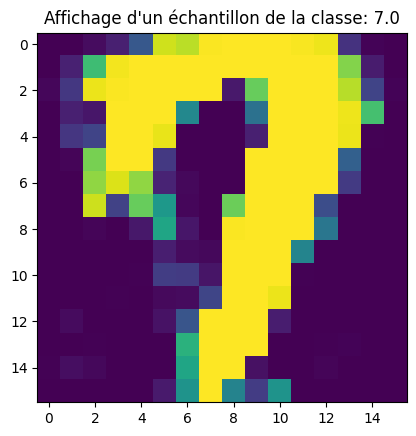

In [25]:
X,Y = load('../data/usps_train.txt')
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,X)])

np.random.seed(0)
#dim = [256,128,64,18]
dim = [256,100,10]
l_encoder = creerEncoder(dim, ReLU())
l_decoder = creerDecoder(dim[::-1], ReLU(), fSortie = Sigmoide())

net = Sequentiel(*l_encoder, *l_decoder)

# tangente hyperbolique
# eps 3e-6, mini-b 32, epochs 20: ressembler un peu
# eps 4e-6,mini-b 32, epochs 20: un peu moins

#SGD
nb_epoch = 20
SGD(net, data, BCELoss(), eps=3e-6, batch_taille=32, nb_iter=nb_epoch)
z = net.forward(X)

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 1
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))
# affichage d'un échantillon
plt.figure()
index = 22
plt.imshow(z[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

## K-MEANS

In [26]:
MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_latent)
# Évaluation des performances
cluster_labels = kmeans.labels_

# Calculer purity
for i in np.unique(Y):
  inx_cluster = np.where(cluster_labels==i)[0]
  Y_cluster = Y[inx_cluster]
  val, occ = np.unique(Y_cluster, return_counts=True)
  print(f"Purity cluster {i}, valeur majoritaire {val[np.argmax(occ)]}: {np.max(occ)/np.sum(occ)}")

Purity cluster 0.0, valeur majoritaire 2.0: 0.36324786324786323
Purity cluster 1.0, valeur majoritaire 6.0: 0.602921646746348
Purity cluster 2.0, valeur majoritaire 3.0: 0.21828571428571428
Purity cluster 3.0, valeur majoritaire 1.0: 0.9179566563467493
Purity cluster 4.0, valeur majoritaire 3.0: 0.4642438452520516
Purity cluster 5.0, valeur majoritaire 9.0: 0.4888597640891219
Purity cluster 6.0, valeur majoritaire 0.0: 0.9365750528541226
Purity cluster 7.0, valeur majoritaire 1.0: 0.9028697571743929
Purity cluster 8.0, valeur majoritaire 0.0: 0.7512953367875648
Purity cluster 9.0, valeur majoritaire 7.0: 0.375


## Projection 2D avec T-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7291 samples in 0.014s...
[t-SNE] Computed neighbors for 7291 samples in 0.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7291
[t-SNE] Computed conditional probabilities for sample 2000 / 7291
[t-SNE] Computed conditional probabilities for sample 3000 / 7291
[t-SNE] Computed conditional probabilities for sample 4000 / 7291
[t-SNE] Computed conditional probabilities for sample 5000 / 7291
[t-SNE] Computed conditional probabilities for sample 6000 / 7291
[t-SNE] Computed conditional probabilities for sample 7000 / 7291
[t-SNE] Computed conditional probabilities for sample 7291 / 7291
[t-SNE] Mean sigma: 3.098193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.686478
[t-SNE] KL divergence after 1000 iterations: 1.291913


[Text(0.5, 1.0, 'T-SNE projection sur data manuscrits')]

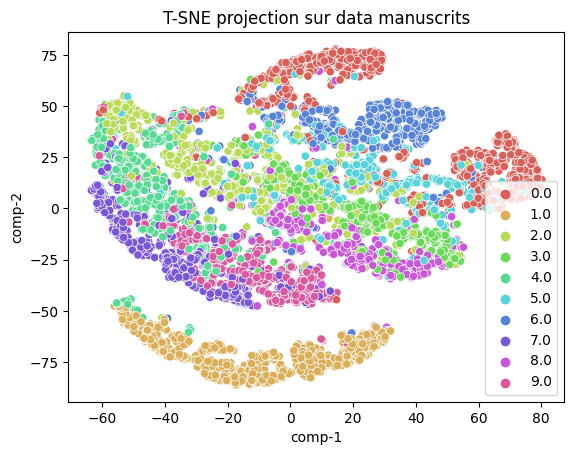

In [27]:
MEncoder = Sequentiel(*l_encoder)

X_latent = MEncoder.forward(X)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_latent)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
#plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE projection sur data manuscrits")

# Utilser la représentation latente pour la classification

In [28]:
# X_latent de ReLU
Y = Y.astype(int)
Y_onehot = np.zeros((Y.size,10));
Y_onehot[np.arange(Y.size),Y]=1
data = np.array([np.array([x,y]).tolist() for x, y in zip(X_latent,Y_onehot)])

100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


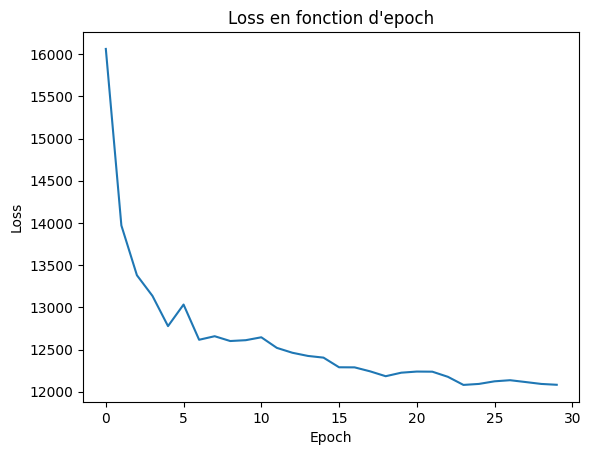

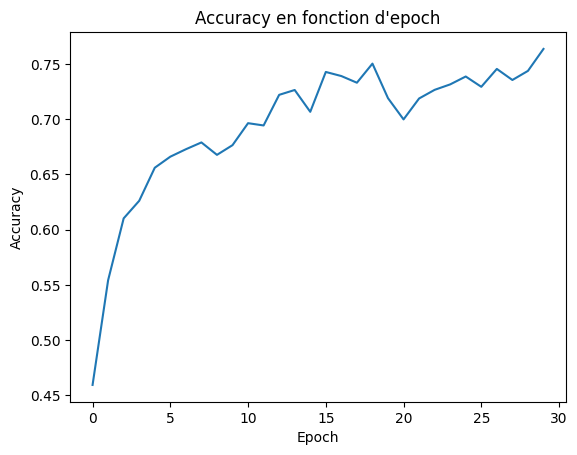

In [31]:
np.random.seed(6)
#ini
nb_couche_latentes = 150
MLin1 = Linear(X_latent.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 10) # 10 classes
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)

#SGD
nb_epoch = 30
l,s = SGD(net, data, SMCELoss(), eps=1e-2, batch_taille=1000, nb_iter=nb_epoch)
#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()
# accuracy
plt.plot(np.arange(nb_epoch),s)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction d'epoch")
plt.show()

In [32]:
Xt,Yt = load('../data/usps_test.txt')
# Encoder X test
Xt_latent = MEncoder.forward(Xt)
Yt = Yt.astype(int)
Yt_onehot = np.zeros((Yt.size,10));
Yt_onehot[np.arange(Yt.size),Yt]=1

print("Score sur data train:", Optim(net, SMCELoss(),eps=1e-2).score(X_latent, Y_onehot))
print("Score sur data test:", Optim(net, SMCELoss(),eps=1e-2).score(Xt_latent, Yt_onehot))

Score sur data train: 0.7635440954601563
Score sur data test: 0.7284504235176881


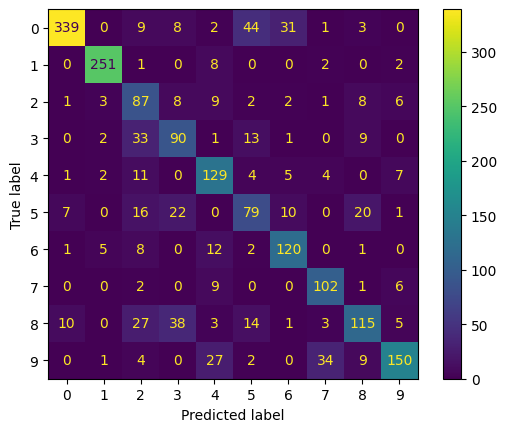

In [35]:
y_test_pred = np.argmax(net.forward(Xt_latent), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test_pred, Yt)